In [2]:
import pandas as pd
import pickle
import numpy as np
import xgboost
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve, average_precision_score,precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pd.set_option("display.max_columns",80)

In [4]:
dataset = r"E:\StudyLAB\1_2564\499\dataset\test_lii.csv"
df = pd.read_csv(dataset)
df = df.dropna(how='any',axis=0)
df.shape
print(df)

      NUMACC  distance  rain  temperatur  wind
0          1    174.60  2.22       27.82  3.80
1          1    111.78  0.56       28.66  5.63
2          1     92.26  2.50       27.84  7.13
3          1     88.52  1.74       26.33  3.91
4          0     67.56  3.58       27.01  3.63
...      ...       ...   ...         ...   ...
1586       0    257.70  0.42       28.07  5.32
1587       1     85.71  0.79       32.28  7.26
1588       1    152.40  1.29       25.56  4.72
1589       0     38.60  0.17       29.24  3.93
1590       0     52.77  1.04       28.56  6.27

[1591 rows x 5 columns]


In [5]:

float_feature_names =['distance','rain','temperatur','wind']

float_features = df.xs(float_feature_names,axis=1).values
scaler = StandardScaler()
float_scaled = scaler.fit_transform(float_features)
print (float_features.mean(axis=0))

with open('scalers.pkl','wb') as fp:
    pickle.dump(scaler,fp)

[173.26080453   2.34109994  26.88800126   4.2772973 ]


In [6]:
y = df['NUMACC'].values
df_cm = df.xs(float_feature_names,axis=1)

In [7]:
X= df_cm.values
y = df['NUMACC'].values
feature_names = df_cm.columns.tolist()


In [8]:
wrangler = {
    'scaler': scaler,
    'float_feature_names': float_feature_names,
   
    'feature_names': feature_names,
   
}
with open('wrangler_new.pkl','wb') as fp:
    pickle.dump(wrangler,fp)

In [10]:
feature_sel = range(len(feature_names))
#feature_sel = [-1,-2,-3]
Xs = X[:,feature_sel]
print(Xs)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.1)#, random_state=2)
fnames = np.array(feature_names)[feature_sel]

dtrain = xgboost.DMatrix(X_train,label=y_train,feature_names=fnames)
dtest =  xgboost.DMatrix(X_test,label=y_test,feature_names=fnames)


params = {
    'max_depth':6,
    'min_child_weight': 5.0,
    'reg_lambda': 1.0,
    'reg_alpha':0.0,
    'scale_pos_weight':1.0,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'eta':0.5
}

[[1.7460e+02 2.2200e+00 2.7820e+01 3.8000e+00]
 [1.1178e+02 5.6000e-01 2.8660e+01 5.6300e+00]
 [9.2260e+01 2.5000e+00 2.7840e+01 7.1300e+00]
 ...
 [1.5240e+02 1.2900e+00 2.5560e+01 4.7200e+00]
 [3.8600e+01 1.7000e-01 2.9240e+01 3.9300e+00]
 [5.2770e+01 1.0400e+00 2.8560e+01 6.2700e+00]]


In [14]:
booster = xgboost.train(params,dtrain,
    evals = [(dtest, 'eval')],
    num_boost_round=3000,
    early_stopping_rounds=25
)

[0]	eval-auc:0.71411
[1]	eval-auc:0.75991
[2]	eval-auc:0.77775
[3]	eval-auc:0.82035
[4]	eval-auc:0.82078
[5]	eval-auc:0.87567
[6]	eval-auc:0.87688
[7]	eval-auc:0.88234
[8]	eval-auc:0.88234
[9]	eval-auc:0.89151
[10]	eval-auc:0.90156
[11]	eval-auc:0.90433
[12]	eval-auc:0.90667
[13]	eval-auc:0.91515
[14]	eval-auc:0.91567
[15]	eval-auc:0.91671
[16]	eval-auc:0.91238
[17]	eval-auc:0.91602
[18]	eval-auc:0.92398
[19]	eval-auc:0.92970
[20]	eval-auc:0.92502
[21]	eval-auc:0.92139
[22]	eval-auc:0.92173
[23]	eval-auc:0.93143
[24]	eval-auc:0.93004
[25]	eval-auc:0.92710
[26]	eval-auc:0.92381
[27]	eval-auc:0.92866
[28]	eval-auc:0.93403
[29]	eval-auc:0.93316
[30]	eval-auc:0.93472
[31]	eval-auc:0.93437
[32]	eval-auc:0.93801
[33]	eval-auc:0.94251
[34]	eval-auc:0.93887
[35]	eval-auc:0.93714
[36]	eval-auc:0.93662
[37]	eval-auc:0.93593
[38]	eval-auc:0.93974
[39]	eval-auc:0.93957
[40]	eval-auc:0.94043
[41]	eval-auc:0.93853
[42]	eval-auc:0.93887
[43]	eval-auc:0.93662
[44]	eval-auc:0.94061
[45]	eval-auc:0.9414

In [16]:

newdata = r"E:\StudyLAB\1_2564\499\dataset\newdata.csv"
df2 = pd.read_csv("demofile2.csv")
df2 = df2.dropna(how='any',axis=0)
df2.head()


,distance,rain,temperatur,wind
0,31.66,4.11,26.12,4.18
1,84.61,0.70,26.64,3.33


In [17]:
feature_sel = range(len(feature_names))
#feature_sel = [-1,-2,-3]
Xs = X[:,feature_sel]
fnames = np.array(feature_names)[feature_sel]
ddata = xgboost.DMatrix(df2,feature_names=fnames)
print(ddata)


In [18]:
booster.predict(ddata)


array([0.998295  , 0.99619687], dtype=float32)

In [36]:
pred=booster.predict(dtest)
# Rs = r2_score(y_test, pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))
# print('The R-squared is {:.4}'.format(Rs))
print('The root mean squared is {:.4}'.format(rmse))


The root mean squared is 0.2751


In [22]:
print(fnames)

['distance' 'rain' 'temperatur' 'wind']


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

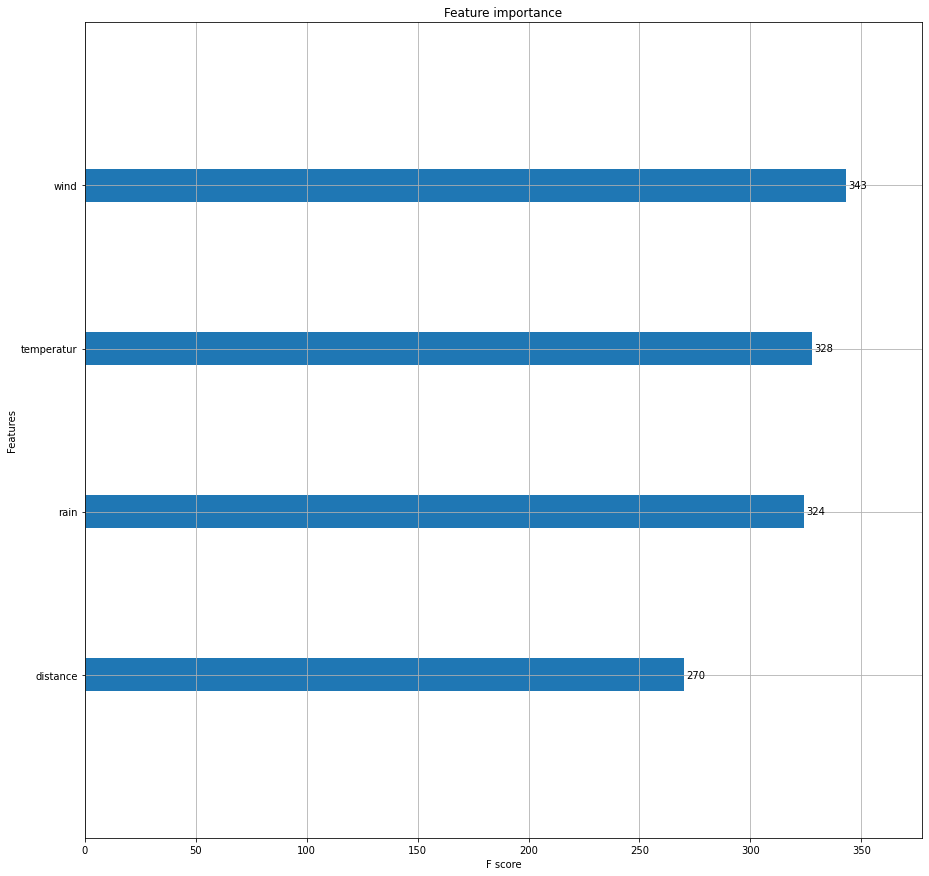

In [23]:
plt.figure(figsize=(15,15))
xgboost.plot_importance(booster,ax=plt.gca(),importance_type='weight')

In [ ]:
booster.save_model('new_0001.model')

In [24]:
booster.predict(dtest)

array([0.9183    , 0.07078623, 0.22528696, 0.24862218, 0.735492  ,
       0.06448036, 0.9634667 , 0.45165673, 0.91088074, 0.8637732 ,
       0.04673143, 0.08621077, 0.9816051 , 0.97884446, 0.2907205 ,
       0.9985494 , 0.01388765, 0.79788846, 0.99339783, 0.05135482,
       0.8540953 , 0.9661704 , 0.9601837 , 0.99648476, 0.8591785 ,
       0.9678885 , 0.13628757, 0.05272526, 0.9902705 , 0.98572564,
       0.99955326, 0.87959236, 0.22885841, 0.9634667 , 0.24153781,
       0.09360833, 0.9392232 , 0.13817452, 0.99316156, 0.8186442 ,
       0.04249549, 0.60498536, 0.06248396, 0.9685721 , 0.98958045,
       0.9778966 , 0.7135579 , 0.67908305, 0.9978473 , 0.99955326,
       0.96505064, 0.9626079 , 0.7122005 , 0.9791697 , 0.96532047,
       0.60498536, 0.96979743, 0.61251485, 0.10019199, 0.9314341 ,
       0.38690907, 0.8860844 , 0.15010762, 0.98934186, 0.99036926,
       0.95761406, 0.7566796 , 0.8587026 , 0.97871506, 0.9970054 ,
       0.05083678, 0.44376814, 0.9686959 , 0.45577994, 0.99829

C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/3020605479.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/3020605479.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)


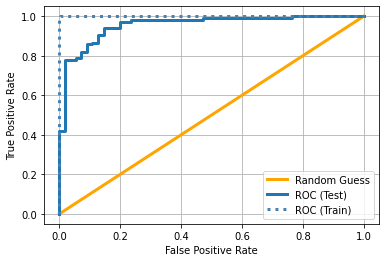

In [26]:
y_pred_test = booster.predict(dtest)


fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)

y_pred_train = booster.predict(dtrain)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_pred_train)
fig,ax = plt.subplots()
plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
plt.plot(fpr,tpr,label='ROC (Test)',lw=3)
plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/794390895.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,tpr,'r-',label='TPR (Test)',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/794390895.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds_train,tpr_train,'r:',label='TPR (Train',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/794390895.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,fpr,'r-',label='FPR (Test)',color='steelblue',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/794390895.py:4: UserWarning: color is redunda

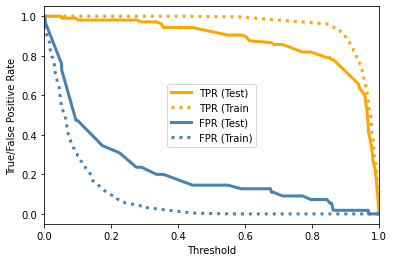

In [27]:

plt.plot(thresholds,tpr,'r-',label='TPR (Test)',color='orange',lw=3)
plt.plot(thresholds_train,tpr_train,'r:',label='TPR (Train',color='orange',lw=3)
plt.plot(thresholds,fpr,'r-',label='FPR (Test)',color='steelblue',lw=3)
plt.plot(thresholds_train,fpr_train,'r:',label='FPR (Train)',color='steelblue',lw=3)
plt.gca().set_xbound(lower=0,upper=1)
plt.xlabel('Threshold')
plt.ylabel('True/False Positive Rate')
plt.legend()

'3.4.0'

<Figure size 1080x1080 with 0 Axes>

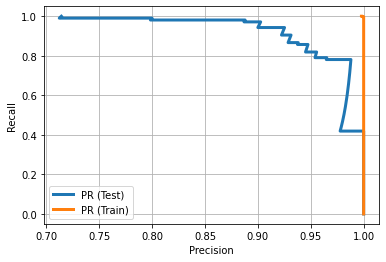

In [28]:

plt.figure(figsize=(15,15))

y_pred_test = booster.predict(dtest)
y_pred_train = booster.predict(dtrain)

precision,recall,thresholds = precision_recall_curve(y_test,y_pred_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train,y_pred_train)
fig,ax = plt.subplots()
plt.plot(precision,recall,label='PR (Test)',lw=3)
plt.plot(precision_train,recall_train,label='PR (Train)',lw=3)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()
plt.legend()
plt.matplotlib.__version__

C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/2109829656.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,precision[:-1],'r-',label='P (Test)',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/2109829656.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds_train,precision_train[:-1],'r:',label='P (Train',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/2109829656.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,recall[:-1],'r-',label='R (Test)',color='steelblue',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_3684/2109829656.py:4: U

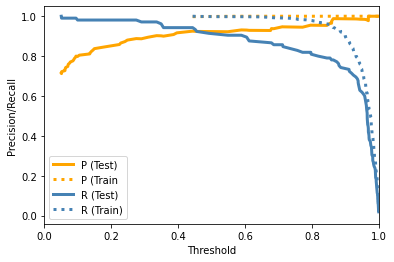

In [29]:
plt.plot(thresholds,precision[:-1],'r-',label='P (Test)',color='orange',lw=3)
plt.plot(thresholds_train,precision_train[:-1],'r:',label='P (Train',color='orange',lw=3)
plt.plot(thresholds,recall[:-1],'r-',label='R (Test)',color='steelblue',lw=3)
plt.plot(thresholds_train,recall_train[:-1],'r:',label='R (Train)',color='steelblue',lw=3)
#plt.plot([0,1],[0,1],'k-',lw=2)
plt.gca().set_xbound(lower=0,upper=1)
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()

In [30]:
y_pred_test = booster.predict(dtest) > 0.19
print ('Test Accuracy:',accuracy_score(y_test,y_pred_test))
print ('Test F1:',f1_score(y_test,y_pred_test))
print ('Test Precision:',precision_score(y_test,y_pred_test))
print ('Test Recall:',recall_score(y_test,y_pred_test))
y_pred_test = booster.predict(dtest)
print ('Test AUC:',roc_auc_score(y_test,y_pred_test))
print ('Test AP:',average_precision_score(y_test,y_pred_test))

y_pred_train = booster.predict(dtrain) > 0.19
print ('Train Accuracy:',accuracy_score(y_train,y_pred_train))
print ('Train F1:',f1_score(y_train,y_pred_train))
print ('Train Precision:',precision_score(y_train,y_pred_train))
print ('Train Recall:',recall_score(y_train,y_pred_train))
y_pred_train = booster.predict(dtrain)
print ('Train AUC:',roc_auc_score(y_train,y_pred_train))
print ('Test AP:',average_precision_score(y_train,y_pred_train))

Test Accuracy: 0.88125
Test F1: 0.9155555555555556
Test Precision: 0.8583333333333333
Test Recall: 0.9809523809523809
Test AUC: 0.9561904761904761
Test AP: 0.9759594022354521
Train Accuracy: 0.9650593990216632
Train F1: 0.9743326488706365
Train Precision: 0.94994994994995
Train Recall: 1.0
Train AUC: 0.9999934414474289
Test AP: 0.9999966735614316


In [31]:
def plot_split_histogram(feature_name):
    hist = booster.get_split_value_histogram(feature_name)
    try:
        i = float_feature_names.index(feature_name)
        fake_data = np.zeros((hist.Count.size,len(float_feature_names)))
        fake_data[:,i] = hist.SplitValue
        hist.loc[:,'SplitValue'] = scaler.inverse_transform(fake_data)[:,i]
    except: pass
    hist.plot(kind='area',x='SplitValue',y='Count')

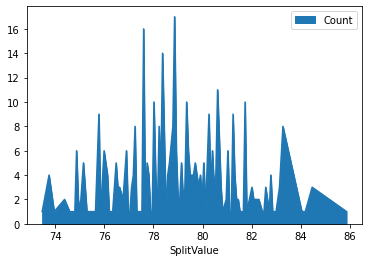

In [ ]:
plot_split_histogram('temperatur')

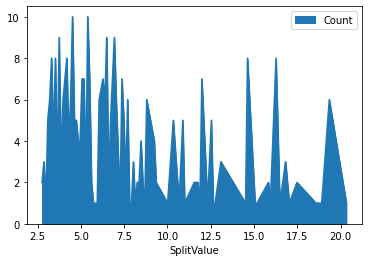

In [32]:
plot_split_histogram('rain')

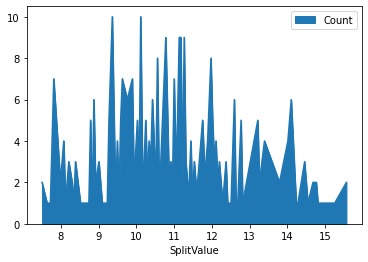

In [33]:
plot_split_histogram('wind')

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

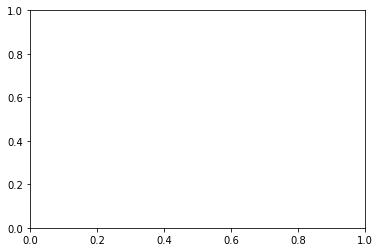

In [35]:
xgboost.plot_tree(booster,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()